<a href="https://colab.research.google.com/github/dhanavel2021/My-Capstone-Project/blob/main/My_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***PROBLEM DESCRIPTION :***


---


---




*Once if the students completed their high schoolings they are asked to 
complete their graduation, there are different branches and that would be varied according to the students wish and goal. Most of the institution will not encourage their students to participate in sports and other activities. 
Education means not only graduating but also making a student or a person fit for society, apart from studies there is a major sector which plays a major role and position in future for the students is sports. This analysis is made to predict average accuracy of sportsman and the level of education he acquires while concentrating in his sports.*



---


---





***IMPORTING LIBRARIES***




---





---







In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

***READING THE DATASET***

---




---




In [3]:
df=pd.read_excel('/content/capstone dataset .xlsx')

In [4]:
df.head()

,AGE,SPORT_PARTICIPANT,EDUCATIONAL_SCORES,FITNESS,HANDICAP,SEX
0,19,0,69,BELOW AVERAGE,NO,FEMALE
1,19,1,87,GOOD,NO,MALE
2,21,0,76,MODERATE,NO,MALE
3,21,0,69,BELOW AVERAGE,NO,FEMALE
4,24,1,87,GOOD,NO,FEMALE


In [5]:
df['SPORT_PARTICIPANT'].value_counts().unique()

array([326, 215])

In [6]:
df.SPORT_PARTICIPANT.value_counts()

0    326
1    215
Name: SPORT_PARTICIPANT, dtype: int64

In [7]:
df.shape

(541, 6)

In [8]:
df.sum().isna()

AGE                   False
SPORT_PARTICIPANT     False
EDUCATIONAL_SCORES    False
FITNESS               False
HANDICAP              False
SEX                   False
dtype: bool

***DATA PREPROCESSING***

---



---



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AGE                 541 non-null    int64 
 1   SPORT_PARTICIPANT   541 non-null    int64 
 2   EDUCATIONAL_SCORES  541 non-null    int64 
 3   FITNESS             541 non-null    object
 4   HANDICAP            541 non-null    object
 5   SEX                 541 non-null    object
dtypes: int64(3), object(3)
memory usage: 25.5+ KB


*CHECKING FOR NULL VALUES*

---



---



In [10]:
df.shape

(541, 6)

In [11]:
df.isna()

,AGE,SPORT_PARTICIPANT,EDUCATIONAL_SCORES,FITNESS,HANDICAP,SEX
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
536,False,False,False,False,False,False
537,False,False,False,False,False,False
538,False,False,False,False,False,False
539,False,False,False,False,False,False


In [12]:
df.count().isna()

AGE                   False
SPORT_PARTICIPANT     False
EDUCATIONAL_SCORES    False
FITNESS               False
HANDICAP              False
SEX                   False
dtype: bool

In [13]:
df['AGE'].value_counts()

22    110
24     98
21     88
23     86
19     83
20     76
Name: AGE, dtype: int64

In [14]:
df['SPORT_PARTICIPANT'].value_counts()

0    326
1    215
Name: SPORT_PARTICIPANT, dtype: int64

In [15]:
df['EDUCATIONAL_SCORES'].value_counts()

87    23
85    22
90    21
94    20
71    19
95    18
78    17
73    17
69    16
59    16
62    16
77    15
75    15
93    15
76    15
61    14
91    13
92    12
79    12
64    12
68    12
70    12
66    12
56    12
51    12
65    11
57    11
50    11
52    11
58    11
86    10
89    10
88     9
54     9
67     8
55     8
74     8
80     8
60     8
72     8
53     8
63     4
Name: EDUCATIONAL_SCORES, dtype: int64

In [16]:
df['FITNESS'].value_counts()

GOOD             215
BELOW AVERAGE    164
MODERATE         162
Name: FITNESS, dtype: int64

In [17]:
df['HANDICAP'].value_counts()

NO     492
YES     49
Name: HANDICAP, dtype: int64

In [18]:
df['SEX'].value_counts()

MALE      299
FEMALE    242
Name: SEX, dtype: int64

*CONVERTING NON-NUMERICAL DATA INTO CATEGORICAL NUMBERIC DATA*

---



---



---



In [19]:
df1=df

In [20]:
df1['FITNESS']=df1['FITNESS'].astype('category')
df1['FITNESS']=df1['FITNESS'].cat.reorder_categories(['GOOD','MODERATE','BELOW AVERAGE'])
df1['FITNESS']=df1['FITNESS'].cat.codes
df1['FITNESS'].value_counts()


0    215
2    164
1    162
Name: FITNESS, dtype: int64

In [21]:
df1['HANDICAP']=df1['HANDICAP'].astype('category')
df1['HANDICAP']=df1['HANDICAP'].cat.reorder_categories(['YES','NO'])
df1['HANDICAP']=df1['HANDICAP'].cat.codes
df1['HANDICAP'].value_counts()

1    492
0     49
Name: HANDICAP, dtype: int64

In [22]:
df1['SEX']=df1['SEX'].astype('category')
df1['SEX']=df1['SEX'].cat.reorder_categories(['MALE','FEMALE'])
df1['SEX']=df1['SEX'].cat.codes
df1['SEX'].value_counts()

0    299
1    242
Name: SEX, dtype: int64

In [23]:
df1

,AGE,SPORT_PARTICIPANT,EDUCATIONAL_SCORES,FITNESS,HANDICAP,SEX
0,19,0,69,2,1,1
1,19,1,87,0,1,0
2,21,0,76,1,1,0
3,21,0,69,2,1,1
4,24,1,87,0,1,1
...,...,...,...,...,...,...
536,23,0,52,1,0,1
537,24,1,69,0,0,0
538,24,0,68,2,1,0
539,22,1,75,0,0,0


In [64]:
df1.describe()

,AGE,SPORT_PARTICIPANT,EDUCATIONAL_SCORES,FITNESS,HANDICAP,SEX
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,21.617375,0.397412,73.532348,0.905730,0.909427,0.447320
std,1.687534,0.489815,13.611861,0.832435,0.287267,0.497677
min,19.000000,0.000000,50.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,62.000000,0.000000,1.000000,0.000000
50%,22.000000,0.000000,73.000000,1.000000,1.000000,0.000000
75%,23.000000,1.000000,87.000000,2.000000,1.000000,1.000000
max,24.000000,1.000000,95.000000,2.000000,1.000000,1.000000


In [65]:
df1.corr()

,AGE,SPORT_PARTICIPANT,EDUCATIONAL_SCORES,FITNESS,HANDICAP,SEX
AGE,1.000000,0.045400,0.024766,-0.046817,-0.006680,-0.067042
SPORT_PARTICIPANT,0.045400,1.000000,0.705640,-0.884424,-0.006933,0.059454
EDUCATIONAL_SCORES,0.024766,0.705640,1.000000,-0.619711,0.022773,0.088343
FITNESS,-0.046817,-0.884424,-0.619711,1.000000,0.010693,-0.050005
HANDICAP,-0.006680,-0.006933,0.022773,0.010693,1.000000,-0.001053
SEX,-0.067042,0.059454,0.088343,-0.050005,-0.001053,1.000000


***EXPLORATORY DATA ANALYSIS***

---



---



---



In [25]:
df.columns

Index(['AGE', 'SPORT_PARTICIPANT', 'EDUCATIONAL_SCORES', 'FITNESS', 'HANDICAP',
       'SEX'],
      dtype='object')

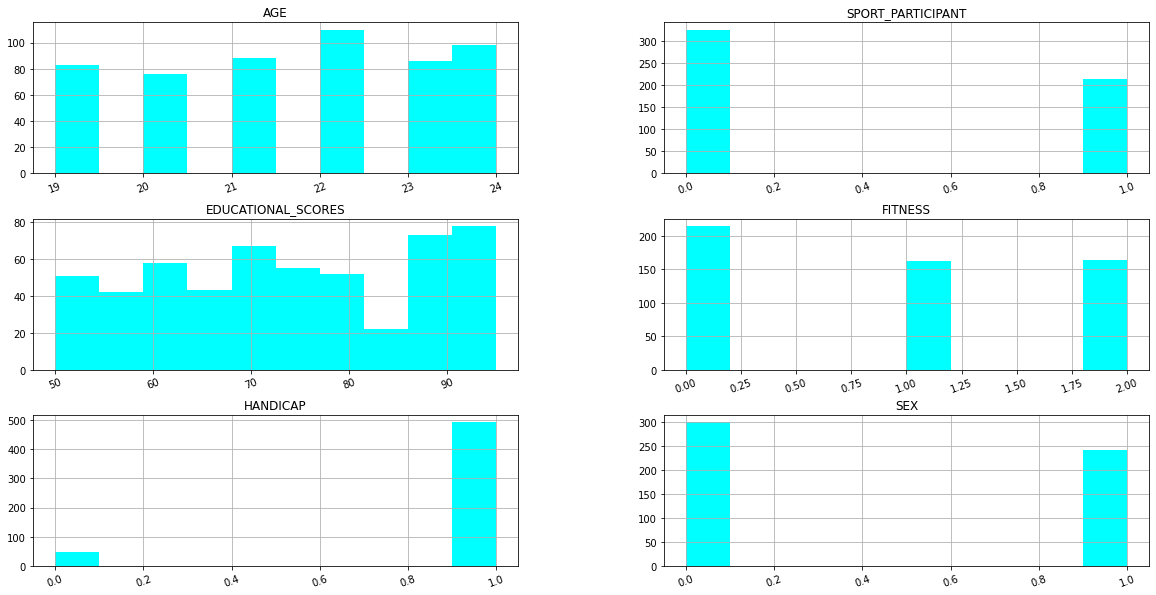

In [26]:
df.hist(xrot=20,figsize=(20,10),color = "cyan")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


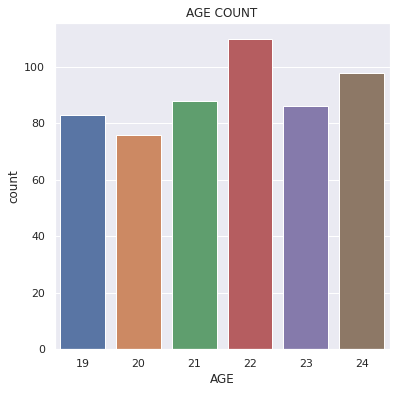

In [92]:
sns.countplot(df['AGE'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('AGE COUNT')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


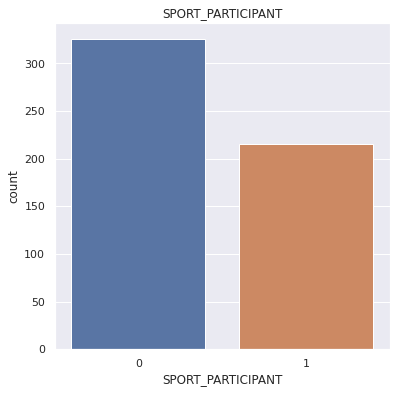

In [93]:
sns.countplot(df['SPORT_PARTICIPANT'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('SPORT_PARTICIPANT')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


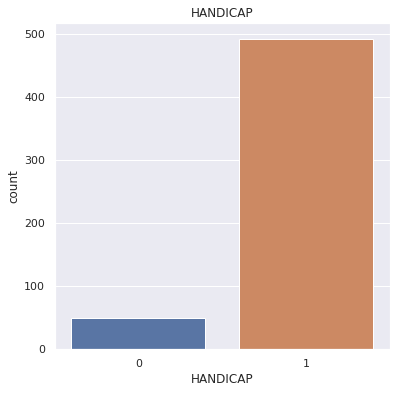

In [94]:
sns.countplot(df['HANDICAP'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('HANDICAP')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


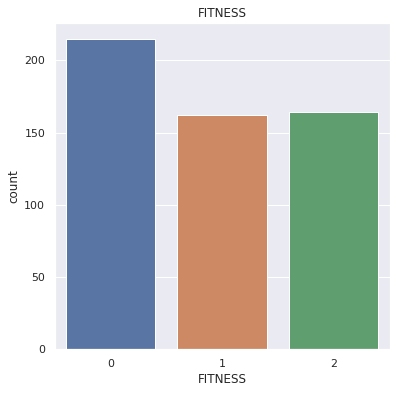

In [95]:
sns.countplot(df['FITNESS'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('FITNESS')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


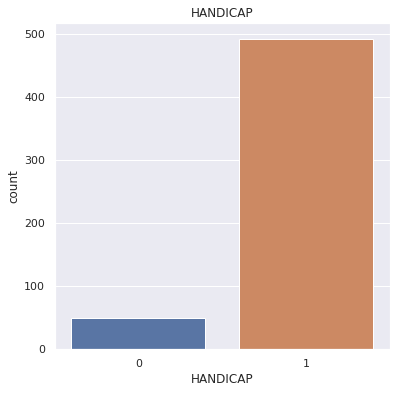

In [96]:
sns.countplot(df['HANDICAP'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('HANDICAP')
plt.show()

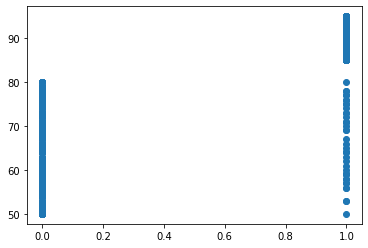

In [32]:
plt.scatter(df['SPORT_PARTICIPANT'],df['EDUCATIONAL_SCORES'])

In [33]:
x=df.drop(['SPORT_PARTICIPANT'],axis=1)
y=df['SPORT_PARTICIPANT']

***MODEL SELECTION***

***1) Desision Tree Model***

In [34]:
from sklearn.tree import DecisionTreeClassifier

***Training And Testing Data***

In [35]:
xtrain, xtest, ytrain, ytest=tts(x,y,test_size=.2,random_state=0)

In [36]:
m=DecisionTreeClassifier()
m.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [37]:
p=m.predict(xtest)

In [38]:
m.predict_proba(xtest)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.

***Performance Prediction***

In [39]:
accuracy_score(ytest,p)

1.0

In [40]:
m.score(xtrain, ytrain)

1.0

Text(0.5, 15.0, 'Predicted Value')

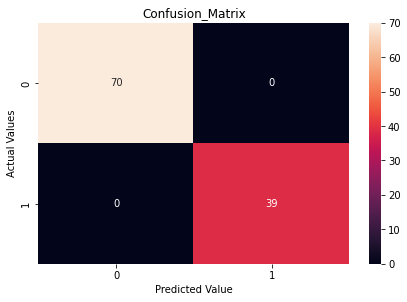

In [41]:
cm=confusion_matrix(ytest,p)
sns.heatmap(pd.DataFrame(cm),annot=True,fmt='g')
sns.set(rc={'figure.figsize':(3,3)})
plt.tight_layout()
plt.title('Confusion_Matrix',y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Value')

In [42]:
z=classification_report(ytest,p)
print(z)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        39

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109



***2) Random Forest Model***

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rm=RandomForestClassifier()
rm.fit(xtrain, ytrain)

RandomForestClassifier()

In [45]:
rp=rm.predict(xtest)

In [46]:
rm.predict_proba(xtest)

array([[0.  , 1.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.03, 0.97],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.98, 0.02],
       [0.07, 0.93],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.02, 0.98],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.01, 0.99],
       [1.  ,

In [47]:
accuracy_score(ytest,rp)

1.0

In [48]:
rm.score(xtrain, ytrain)

1.0

Text(0.5, 3.5, 'Predicted Value')

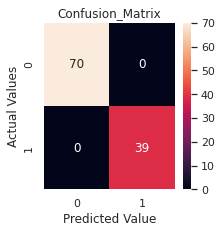

In [49]:
cr=confusion_matrix(ytest,rp)
sns.heatmap(pd.DataFrame(cr),annot=True,fmt='g')
sns.set(rc={'figure.figsize':(3,3)})
plt.tight_layout()
plt.title('Confusion_Matrix',y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Value')

In [120]:
z1=classification_report(ytest,rp)
print(z1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        39

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109



***3)Gradient Boosting***

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
gm=GradientBoostingClassifier()

In [52]:
gm.fit(xtrain, ytrain)

GradientBoostingClassifier()

In [53]:
gp=gm.predict(xtest)

In [54]:
gm.predict_proba(xtest)

array([[2.56764030e-05, 9.99974324e-01],
       [9.99981995e-01, 1.80054455e-05],
       [9.99981995e-01, 1.80054455e-05],
       [9.99981995e-01, 1.80054455e-05],
       [9.99981995e-01, 1.80054455e-05],
       [9.99981995e-01, 1.80054455e-05],
       [2.56764030e-05, 9.99974324e-01],
       [9.99981995e-01, 1.80054455e-05],
       [9.99981995e-01, 1.80054455e-05],
       [2.56764030e-05, 9.99974324e-01],
       [2.56764030e-05, 9.99974324e-01],
       [9.99981995e-01, 1.80054455e-05],
       [9.99981995e-01, 1.80054455e-05],
       [9.99981995e-01, 1.80054455e-05],
       [2.56764030e-05, 9.99974324e-01],
       [2.56764030e-05, 9.99974324e-01],
       [2.56764030e-05, 9.99974324e-01],
       [2.56764030e-05, 9.99974324e-01],
       [2.56764030e-05, 9.99974324e-01],
       [9.99981995e-01, 1.80054455e-05],
       [9.99981995e-01, 1.80054455e-05],
       [9.99981995e-01, 1.80054455e-05],
       [9.99981995e-01, 1.80054455e-05],
       [9.99981995e-01, 1.80054455e-05],
       [9.999819

In [55]:
accuracy_score(ytest,gp)

1.0

In [ ]:
gm.score(xtrain, ytrain)

1.0

Text(0.5, 3.5, 'Predicted Value')

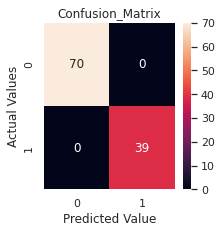

In [56]:
cg=confusion_matrix(ytest,gp)
sns.heatmap(pd.DataFrame(cg),annot=True,fmt='g')
sns.set(rc={'figure.figsize':(3,3)})
plt.tight_layout()
plt.title('Confusion_Matrix',y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Value')

In [57]:
zz=classification_report(ytest,gp)
print(zz)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        39

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109



***4) Support Vector Machine***

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
sm=KNeighborsClassifier()

In [61]:
sm.fit(xtrain, ytrain)

KNeighborsClassifier()

In [62]:
sp=sm.predict(xtest)

In [63]:
accuracy_score(ytest,sp)

0.9357798165137615

In [111]:
sm.score(xtrain, ytrain)

0.9444444444444444

Text(0.5, 3.5, 'Predicted Value')

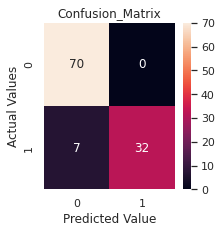

In [86]:
sr=confusion_matrix(ytest,sp)
sns.heatmap(pd.DataFrame(sr),annot=True,fmt='g')
sns.set(rc={'figure.figsize':(3,3)})
plt.tight_layout()
plt.title('Confusion_Matrix',y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Value')

In [121]:
z2=classification_report(ytest, sp)
print(z2)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        70
           1       1.00      0.82      0.90        39

    accuracy                           0.94       109
   macro avg       0.95      0.91      0.93       109
weighted avg       0.94      0.94      0.93       109



***5)KNN***

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
km=KNeighborsClassifier()
km.fit(xtrain, ytrain)

KNeighborsClassifier()

In [83]:
kp=km.predict(xtest)

In [84]:
accuracy_score(ytest,kp)

0.9357798165137615

In [109]:
km.score(xtrain, ytrain)

0.9444444444444444

Text(0.5, 3.5, 'Predicted Value')

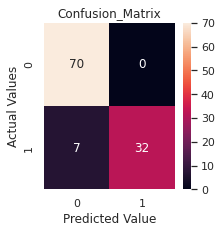

In [87]:
kr=confusion_matrix(ytest,kp)
sns.heatmap(pd.DataFrame(kr),annot=True,fmt='g')
sns.set(rc={'figure.figsize':(3,3)})
plt.tight_layout()
plt.title('Confusion_Matrix',y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Value')

In [89]:
zzz=classification_report(ytest, kp)
print(zzz)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        70
           1       1.00      0.82      0.90        39

    accuracy                           0.94       109
   macro avg       0.95      0.91      0.93       109
weighted avg       0.94      0.94      0.93       109



***6)Naive Bayes***

In [112]:
from sklearn.naive_bayes import GaussianNB

In [113]:
nm=GaussianNB()

In [114]:
nm.fit(xtrain, ytrain)

GaussianNB()

In [115]:
np=gm.predict(xtest)

In [116]:
accuracy_score(ytest,np)

1.0

In [118]:
nm.score(xtrain, ytrain)

1.0

Text(0.5, 3.5, 'Predicted Value')

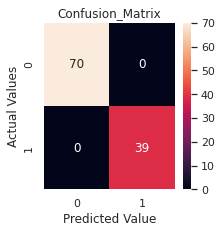

In [122]:
nr=confusion_matrix(ytest,np)
sns.heatmap(pd.DataFrame(nr),annot=True,fmt='g')
sns.set(rc={'figure.figsize':(3,3)})
plt.tight_layout()
plt.title('Confusion_Matrix',y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Value')

In [124]:
z3=classification_report(ytest,np)
print(z3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        39

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109



***7)Logistic Regression***

In [126]:
from sklearn.linear_model import LogisticRegression

In [128]:
lm=LogisticRegression()
lm.fit(xtrain, ytrain)

LogisticRegression()

In [129]:
lp=lm.predict(xtest)

In [130]:
accuracy_score(ytest, lp)

1.0

In [131]:
lm.score(xtrain, ytrain)

1.0

Text(0.5, 3.5, 'Predicted Value')

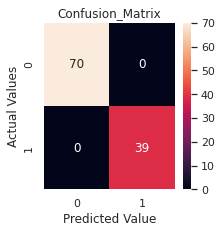

In [132]:
lr=confusion_matrix(ytest,lp)
sns.heatmap(pd.DataFrame(lr),annot=True,fmt='g')
sns.set(rc={'figure.figsize':(3,3)})
plt.tight_layout()
plt.title('Confusion_Matrix',y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Value')

In [133]:
z4=classification_report(ytest, lp)
print(z4)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        39

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109



***Accuracy Scores of Different Models Are***

In [138]:
print('Accuracy Score Of Decision Tree Classifier',accuracy_score(ytest,p))
print()
print('Accuracy Score Of Random Forest Classifier',accuracy_score(ytest,rp))
print()
print('Accuracy Score Of Gradient Boosting Classifier',accuracy_score(ytest,gp))
print()
print('Accuracy Score Of Support Vector Machine',accuracy_score(ytest,sp))
print()
print('Accuracy Score Of KNeighbors Classifier',accuracy_score(ytest,kp))
print()
print('Accuracy Score Of Naive Bayes',accuracy_score(ytest,np))
print()
print('Accuracy Score Of Logistic Regression',accuracy_score(ytest,lp))

Accuracy Score Of Decision Tree Classifier 1.0

Accuracy Score Of Random Forest Classifier 1.0

Accuracy Score Of Gradient Boosting Classifier 1.0

Accuracy Score Of Support Vector Machine 0.9357798165137615

Accuracy Score Of KNeighbors Classifier 0.9357798165137615

Accuracy Score Of Naive Bayes 1.0

Accuracy Score Of Logistic Regression 1.0
